### Sentiment analysis on IMDB Movie review data
You are provided with a dataset IMDB_Reviews.csv containing a collection of movie reviews from IMDB.

Each review is labeled as positive or negative based on the sentiment expressed in the text.

Your task is to build a text classification model that can predict whether a given movie review expresses a positive or negative sentiment.

#### Initial setup - python package download

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install transformers
!pip install wordcloud
!pip install sklearn
!pip install textblob




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 14.5 MB/s eta 0:00:01
   --- ------------------------------------ 1.1/12.2 MB 13.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/12.2 MB 12.9 MB/s eta 0:00:01
   ------- -------------------------------- 2.2/12.2 MB 12.5 MB/s eta 0:00:01
   -------- ------------------------------- 2.7/12.2 MB 12.4 MB/s eta 0:00:01
   ---------- ----------------------------- 3.2/12.2 MB 12.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.8/12.2 MB 12.1 MB/s eta 0:00:01
   -------------- ------------------------- 4.3/12.2 MB 12.0 MB/s eta 0:00:01
   --------------- ------------------------ 4.9/12.2 MB 11.9 MB/s eta 0:00:01
   ----------------- ---------------------- 5.4/12.2 MB 11.9 MB/s eta 0:00:01
   ------------------- -------------------- 6.0/12.2 MB 11.9 MB/s eta 0:00:01
   -------------------- ------------------- 6.3/12.2 MB 11.9 MB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



#### MetaData: Dataset: IMDB Reviews.csv format (uploaded as separate file)
##### 1.a Download Data Set

In [1]:
import pandas as pd
review_data = pd.read_csv('IMDB Dataset.csv', delimiter=',')

##### 1.b Import Libraries

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import matplotlib
import string
import nltk
#nltk.download()
nltk.download('stopwords')
#nltk.download('punkt')
from textblob import TextBlob
from nltk.corpus import stopwords
from transformers import BertTokenizer
import collections
from wordcloud import WordCloud

%matplotlib inline 
cmap_jet = matplotlib.colormaps.get_cmap('jet')
cmap_spectral = matplotlib.colormaps.get_cmap('Spectral')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### 2. Data Visualization and Exploration 

#### 2 a. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [82]:
review_data.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


#### 2 b.	Provide appropriate data visualizations to get an insight about the dataset. 

In [3]:
# Rename columnn 'y' to 'Target' column for consistency
# Convert it to binary
review_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

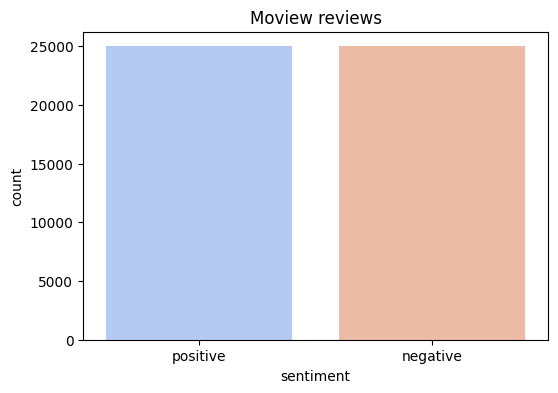

In [4]:
# 2. Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', hue='sentiment', data=review_data, palette='coolwarm', legend=False)
plt.title('Moview reviews')
plt.show()

In [88]:
review_data.shape

(50000, 2)

In [89]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


##### 2.c Correlation Analysis - Will do this after preprocessing and cleaning dataset

##### 3.a Data Preprocessing

##### Convert all reviews to lowercase

In [5]:
review_data['review'] = review_data['review'].str.lower()
review_data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


##### Remove HTML Tags and urls and special charaters

In [33]:
import re

def del_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def del_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

def del_specialChar(text):
    patt = r'\B([!@#%&-]+)\s'
    return re.sub(patt, '', text)

review_data['review'] = review_data['review'].apply(del_html_tags)
review_data['review'] = review_data['review'].apply(del_url)
review_data['review'] = review_data['review'].apply(del_specialChar)
review_data.head()

,review,sentiment,tokens
0,one reviewers mentioned watching 1 oz e...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming techniqu...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend Tears eyes ...,positive,"[thought, wonderful, way, spend, tears, eyes, ..."
3,basically theres family little boy jake thi...,negative,"[basically, there, ##s, family, little, boy, j..."
4,petter matteis love Tears eyes money vi...,positive,"[pet, ##ter, matt, ##eis, love, tears, eyes, m..."


##### Remove punctuations

In [39]:
def del_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

review_data['review'] = review_data['review'].apply(del_punc)
review_data.head()

,review,sentiment,tokens
0,one reviewers mentioned watching 1 oz e...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming techniqu...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend Tears eyes ...,positive,"[thought, wonderful, way, spend, tears, eyes, ..."
3,basically theres family little boy jake thi...,negative,"[basically, there, ##s, family, little, boy, j..."
4,petter matteis love Tears eyes money vi...,positive,"[pet, ##ter, matt, ##eis, love, tears, eyes, m..."


##### Expand chat abbrevations

In [8]:
# Get list from https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt

abbrevations = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

def fix_abbrevations(text):
    new_text = []
    for i in text.split():
        if i.upper() in abbrevations:
            new_text.append(abbrevations[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

review_data['review'] = review_data['review'].apply(fix_abbrevations)
review_data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend Te...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the Tears in my eyes of...,positive


##### Make Spelling corrections

In [52]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [53]:
# Calling function
def fix_spellings(text):
    return TextBlob(text).correct().string

review_data['review'] = review_data['review'].apply(fix_spellings)
review_data.head()

KeyboardInterrupt: 

##### Clear stop words
Remove Common words like: is, the, a, to etc

In [40]:
stopword = stopwords.words('english')
def del_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopword:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)
review_data['review'] = review_data['review'].apply(del_stopwords)
review_data.head()

,review,sentiment,tokens
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend Tears eyes hot sum...,positive,"[thought, wonderful, way, spend, tears, eyes, ..."
3,basically theres family little boy jake thinks...,negative,"[basically, there, ##s, family, little, boy, j..."
4,petter matteis love Tears eyes money visually ...,positive,"[pet, ##ter, matt, ##eis, love, tears, eyes, m..."


In [96]:
# Load the pre-trained BERT tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenize text
def create_tokens(text):
    #return tokenizer.tokenize(text)
    return review_data.review[0].split()

review_data['tokens'] = review_data['review'].apply(create_tokens)
review_data['label'] = review_data['sentiment'].map({'positive': 1, 'negative': 0})

##### 2.c Correlation Analysis
Now that the data is cleaned, we can now proceed with correlation analysis

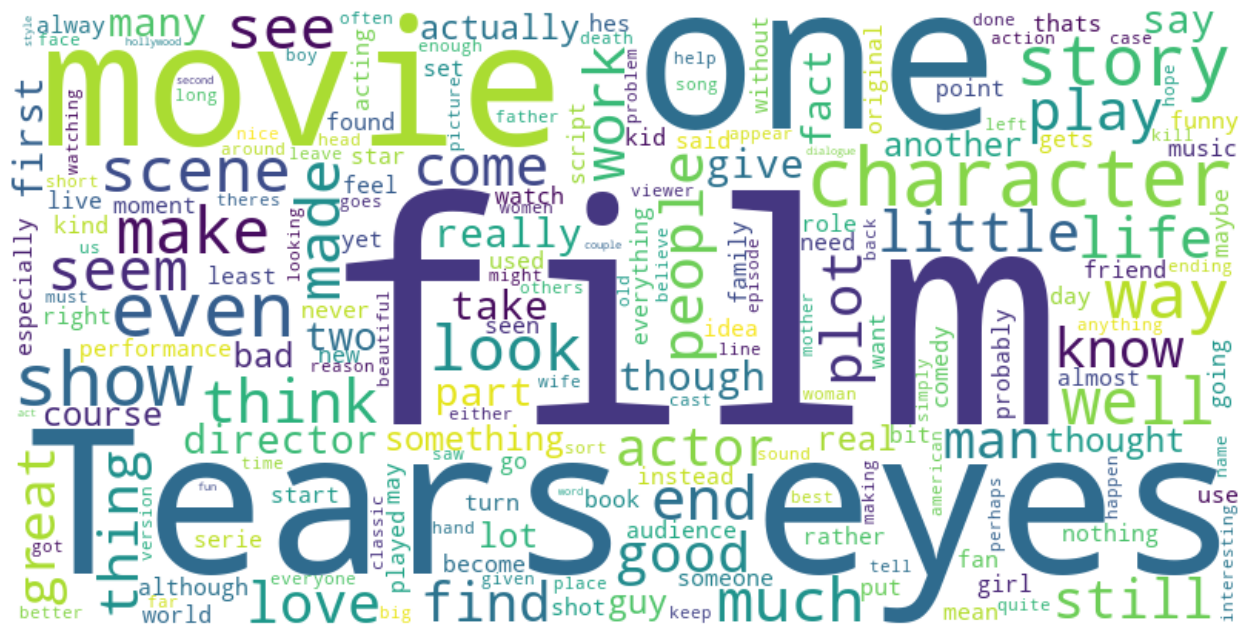

In [54]:
# Generate a word cloud from the message text data
text = " ".join(sentence for sentence in review_data.review)
wordcloud = WordCloud(width=800, height=400, max_font_size=200,
background_color="white")
# Generate the word cloud
wordcloud.generate(text)
# Display the word cloud image
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [101]:
df=review_data
df=df.drop(columns=['sentiment','review'])

In [102]:
!pip install datasets

     ---------------------------------------- 0.0/71.4 kB ? eta -:--:--
     ---------------------------------------- 71.4/71.4 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/485.4 kB ? eta -:--:--
   --------------------------------------- 485.4/485.4 kB 15.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   ---------------------------------------- 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/183.9 kB ? eta -:--:--
   --------------------------------------- 183.9/183.9 kB 10.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/442.9 kB ? eta -:--:--
   --------------------------------------- 442.9/442.9 kB 14.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/143.5 kB ? eta -:--:--
   ---------------------------------------- 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
    -------------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [117]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB 8.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.1 MB 9.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.1 MB 10.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/11.1 MB 10.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.1 MB 10.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.9/11.1 MB 10.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.1 MB 11.1 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/11.1 MB 11.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.1 MB 11.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.1/11.1 MB 11.3 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [128]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [119]:
train_dataset = review_data[:35000]
test_dataset = review_data.tail(15000)
train_dataset.tail()

,review,sentiment,tokens,label
34995,awful awful awful show real world issues dealt...,negative,"[one, reviewers, mentioned, watching, 1, oz, e...",0
34996,like action movies softspot b flicks bad dialo...,negative,"[one, reviewers, mentioned, watching, 1, oz, e...",0
34997,begins nice note falter quickly let expectatio...,negative,"[one, reviewers, mentioned, watching, 1, oz, e...",0
34998,aardman next pixar aardman animation proves an...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1
34999,movie made laugh much bloody joke tell truth u...,negative,"[one, reviewers, mentioned, watching, 1, oz, e...",0


In [127]:
X = review_data["review"]
y = review_data['sentiment']
one = OneHotEncoder()
y = one.fit_transform(np.asarray(y).reshape(-1,1)).toarray()
print(y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   shuffle=True)

In [130]:
# important properties
vocab_size = 10000
max_length = 50

trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [133]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\ankur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [143]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, LSTM


In [135]:
# Define tokenizer and fit on texts
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [137]:
# Let's Tokenize and pad texts
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type)
X_test = pad_sequences(X_test, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type)

In [147]:
from keras.callbacks import EarlyStopping

In [150]:
def build_model():
    model = Sequential()

    model.add(Embedding(vocab_size, 64, input_length=max_length))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))  # Add dropout regularization

    model.add(LSTM(32, return_sequences=True))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))  # Add dropout regularization

    model.add(LSTM(32))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))  # Add dropout regularization
    
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Apply early stopping

    return model, early_stopping

model, early_stopping = build_model()

In [151]:
batch_size = 250
history = model.fit(X_train,y_train,epochs=15,batch_size=batch_size,validation_split=.1,callbacks=[early_stopping])

Epoch 1/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.6610 - loss: 0.5776 - val_accuracy: 0.8235 - val_loss: 0.3911
Epoch 2/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.8699 - loss: 0.3194 - val_accuracy: 0.8285 - val_loss: 0.3984
Epoch 3/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.8991 - loss: 0.2586 - val_accuracy: 0.8198 - val_loss: 0.4074
Epoch 4/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9249 - loss: 0.2033 - val_accuracy: 0.8133 - val_loss: 0.4745


In [152]:
score = model.evaluate(np.asarray(X_test),np.asarray(y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8114 - loss: 0.4785


In [154]:
score

[0.48460766673088074, 0.8116000294685364]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true are the true labels and y_pred are the predicted labels
y_true = [0, 1, 0, 1, 0, 1, 1]  # replace with your actual labels
y_pred = [0, 0, 0, 1, 0, 1, 1]  # replace with your actual predictions

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [59]:
words = pd.concat([pd.Series(row['sentiment'], row['tokens'])              
    for _, row in review_data.iterrows()]).reset_index()
words.columns = ['word', 'sentiment']
#print(words.head(10))
df=words.groupby(['sentiment', 'word']).size().reset_index(name='Count')

In [77]:
words = pd.concat([pd.Series(row['sentiment'], row['tokens'])              
    for _, row in review_data.iterrows()]).reset_index()
words.columns = ['word', 'sentiment']
words=words.groupby(['sentiment', 'word']).size().reset_index(name='Count').sort_values(by='Count')


In [89]:
df1=words[words['sentiment'] == 'positive'].drop(columns=['sentiment']).rename(columns={'Count':'positiveCount'})
df2=words[words['sentiment'] == 'negative'].drop(columns=['sentiment']).rename(columns={'Count':'negativeCount'})

df=pd.merge(df1, df2, on='word', how='outer')
df['netpositive'] = df['positiveCount'] - df['negativeCount']

           word  positiveCount  negativeCount  netpositive
0             1          25000          25000            0
1    accustomed          25000          25000            0
2        agenda          25000          25000            0
3    agreements          25000          25000            0
4        appeal          25000          25000            0
..          ...            ...            ...          ...
138        word          25000          25000            0
139      wordit          25000          25000            0
140       would          25000          25000            0
141     wouldnt          25000          25000            0
142       youll          25000          25000            0

[143 rows x 4 columns]


In [94]:
print(df.sort_values(by='netpositive',ascending=False))

           word  positiveCount  negativeCount  netpositive
0             1          25000          25000            0
1    accustomed          25000          25000            0
2        agenda          25000          25000            0
3    agreements          25000          25000            0
4        appeal          25000          25000            0
..          ...            ...            ...          ...
138        word          25000          25000            0
139      wordit          25000          25000            0
140       would          25000          25000            0
141     wouldnt          25000          25000            0
142       youll          25000          25000            0

[143 rows x 4 columns]


In [75]:
words[words[sentiment]=='positive']

NameError: name 'sentiment' is not defined

In [62]:
words = pd.concat([pd.Series(row['sentiment'], row['tokens'])  
words.head(20)

SyntaxError: '[' was never closed (2969415850.py, line 1)

In [101]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()

NameError: name 'top_words' is not defined

<Figure size 1000x600 with 0 Axes>

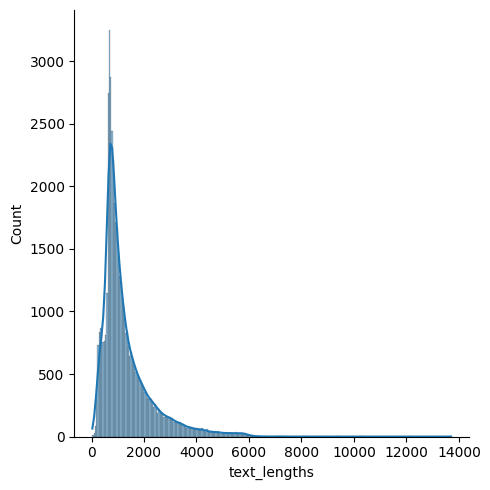

In [ ]:
# Calculate the length of each text in the "content" column
review_data['text_lengths'] = review_data['review'].apply(len)
# Compute descriptive statistics of text lengths
#print(review_data['text_lengths'].describe())
# Plot
sns.displot(review_data, x="text_lengths", kde=True)
#sns.pairplot(review_data[['text_lengths','sentiment']],hue='sentiment')

In [66]:
print('#### Print first 2 Values ####')
review_data.head(20)

#### Print first 2 Values ####


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [78]:
print('#### Check for unique values ####')
review_data.describe()

#### Check for unique values ####


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [79]:
print('Show count of duplicated reviews')
review_data.duplicated().sum()

Show count of duplicated reviews


np.int64(418)

In [73]:
print('#### Check for Null Values ####')
review_data.isnull().sum()

#### Check for Null Values ####


review       0
sentiment    0
dtype: int64

In [74]:
print('#### Check for NAN Values ####')
review_data.isna().sum()

#### Check for NAN Values ####


review       0
sentiment    0
dtype: int64

##### 2.b Data Visualization

#### Univariate Analysis

##### Exploring Target Variable

In [45]:
# Rename columnn 'y' to 'Target' column for consistency
# Convert it to binary
review_data.rename(columns={'y': 'sentiment'}, inplace=True)
review_data['Target'] = review_data['sentiment'].map({'positive': 1, 'negative': 0})  # Convert target to binary
review_data['Target'].value_counts()

Target
1    25000
0    25000
Name: count, dtype: int64

In [25]:
25000 / (25000 + 25000)  # 50% of the data is positive

0.5

##### There is no class imbalance , both class have equal number of data

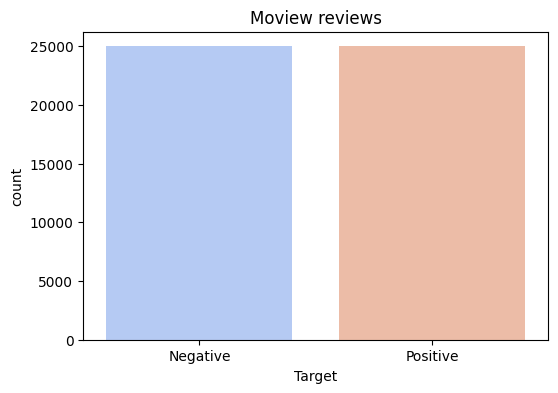

In [57]:
# 2. Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', hue='Target', data=review_data, palette='coolwarm', legend=False)
plt.title('Moview reviews')
plt.xticks([0, 1], ['Negative', 'Positive'])
#plt.tight_layout()
plt.show()

##### Explore Nominal Features

##### 2.c Correlation Analysis

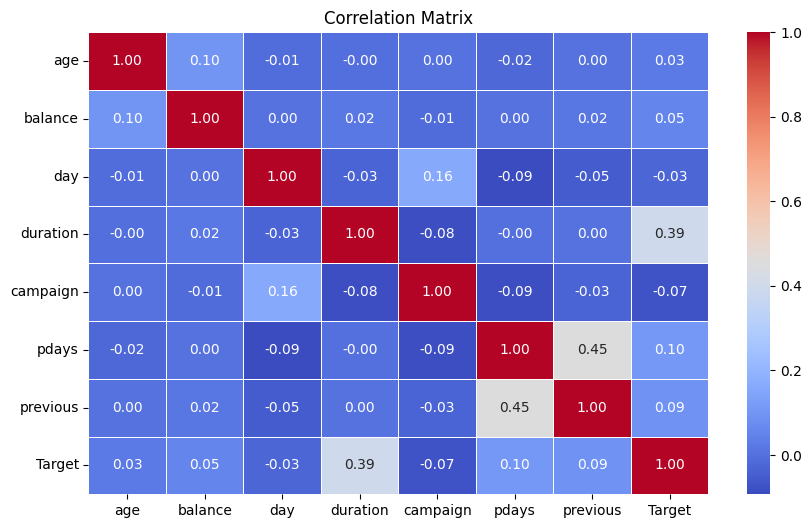

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
numeric_cols = review_data.select_dtypes(include=['int64', 'float64']).columns
corr = review_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Corelation exists between target and call duration
- Also correlation exists between pdays and previous contact
- Yes, correlational analysis have effect on feature selection as strongly shows that target is highly related to call duration. Also it shows that pdays and previous is highly correlated, hence both can be dropped

##### 3. Data Pre-processing and cleaning

3.a Handle null/missing data, outliners and skewness

In [58]:
# Checking for Missing Values
review_data.isnull().sum()

review       0
sentiment    0
Target       0
dtype: int64

No missing values

In [59]:
# Detecting Outliers using IQR method
def detect_outliers(review_data, column):
    Q1 = review_data[column].quantile(0.25)
    Q3 = review_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return review_data[(review_data[column] < lower_bound) | (review_data[column] > upper_bound)].shape[0]

# Detecting outliers using IQR method
outlier_counts = {col: detect_outliers(review_data, col) for col in ['review', 'target']}
outlier_counts

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [160]:
# Checking for Skewness in numerical features
review_data[['age', 'balance', 'duration', 'campaign']].skew()

age         0.684818
balance     8.360308
duration    3.144318
campaign    4.898650
dtype: float64

Scaling the skewness

In [ ]:
review_data['age_log'] = np.log(review_data['age'])
with np.errstate(divide='ignore'):
    review_data['balance_log'] = np.log(review_data['balance'] + 1 - review_data['balance'].min()) ## handle 0 and negative values as well
review_data['duration_log'] = np.log(review_data['duration'] + 1)
review_data['campaign_log'] = np.log(review_data['campaign'] + 1)


In [163]:
# Drop ['age', 'balance', 'duration', 'campaign'] columns
review_data.drop(['age', 'balance', 'duration', 'campaign'], axis=1, inplace=True)
# Rename back to ['age', 'balance', 'duration', 'campaign']
review_data.rename(columns={'age_log': 'age', 'balance_log': 'balance', 'duration_log': 'duration', 'campaign_log': 'campaign'}, inplace=True)

In [199]:
review_data.head(5)

,job,marital,education,housing,loan,contact,month,poutcome,Target,age,balance,duration,campaign
0,management,married,tertiary,yes,no,unknown,may,unknown,0,4.060443,9.226509,5.568345,0.693147
1,technician,single,secondary,yes,no,unknown,may,unknown,0,3.784190,8.993303,5.023881,0.693147
2,entrepreneur,married,secondary,yes,yes,unknown,may,unknown,0,3.496508,8.989943,4.343805,0.693147
3,blue-collar,married,unknown,yes,no,unknown,may,unknown,0,3.850148,9.161780,4.532599,0.693147
4,unknown,single,unknown,no,no,unknown,may,unknown,0,3.496508,8.989818,5.293305,0.693147


##### 3.b Apply One-Hot Encoding

In [200]:
# Convert categorical variables using One-Hot Encoding
review_data_encoded = pd.get_dummies(review_data, drop_first=True)

##### 4. Model Building

##### 4.a Split the dataset into training and test sets

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Split data into features and target variable
X = review_data_encoded.drop(columns=['Target'])  # Features
y = review_data_encoded['Target']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
# Split into training and test sets
# Train = 70 % Test = 30% 
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)

##### 4.b Logistic Regression Model

In [203]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [205]:
# Ensure X_train and y_train have the same number of samples
X_train, y_train = X_train[:len(y_train)], y_train[:len(X_train)]
model_LR = LogisticRegression(random_state=100) 
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [206]:
model_LR.classes_

array([0, 1])

In [207]:
model_LR.coef_

array([[-0.14810738,  1.47643379, 15.23385935, -1.0669592 , -0.32328257,
        -0.31013358, -0.39558412, -0.15197791,  0.18204353, -0.21297667,
        -0.21135426,  0.35321064, -0.19990902, -0.1989847 , -0.42003049,
        -0.19338271,  0.0510362 ,  0.15732286,  0.3360198 ,  0.1472651 ,
        -0.66198753, -0.37710477, -0.03906467, -1.46013229, -0.61589582,
         0.55455124, -0.27402743, -1.14757503, -0.7885081 ,  0.34622208,
         1.7394074 , -0.4712178 , -0.77716142,  0.95932849,  0.86487375,
         0.22407097,  2.27585627, -0.10338323]])

**This shows that call duration and outcome of the previous marketing campaign are most important features.**

In [208]:
model_LR.intercept_

array([-12.11190056])

In [209]:
predicted = model_LR.predict(X_test)

In [210]:
actual = y_test

In [211]:
accuracy_score(actual,predicted)

0.9016919163994249

In [212]:
confusion_matrix(actual, predicted)

array([[7778,  174],
       [ 715,  376]])

In [214]:
classification_report(actual, predicted)

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95      7952\n           1       0.68      0.34      0.46      1091\n\n    accuracy                           0.90      9043\n   macro avg       0.80      0.66      0.70      9043\nweighted avg       0.89      0.90      0.89      9043\n'

##### 4.b Decision Tree Model

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [218]:
y_pred = dt.predict(X_test)

In [219]:
actuals = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(actuals, predictions)

array([[7328,  624],
       [ 570,  521]])

In [223]:
accuracy_score(actuals,predictions)

0.8679641711821299

<Axes: >

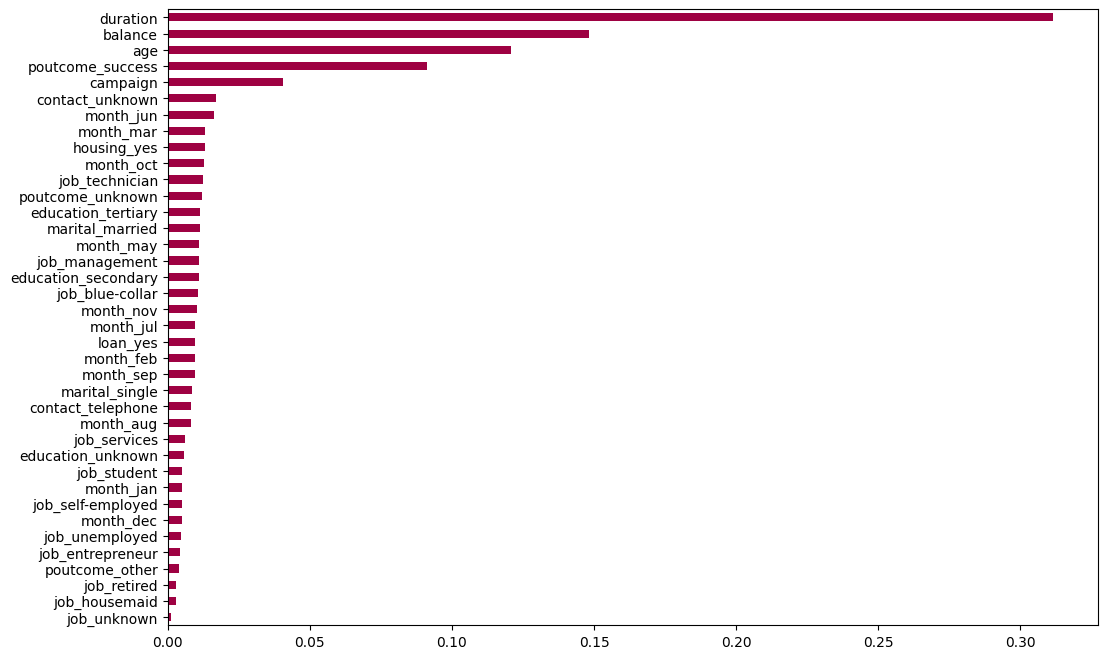

In [222]:
importances=pd.Series(dt.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', figsize=(12,8), cmap=cmap_spectral)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder().fit_transform(X_train)





print(len(X_train[0]))
print(len(X_test[0]))
# print(X_train.columns)
# print(X_test.columns)
# Replace infinite values with NaN

# print(X_train.dtypes)
# # print(X_train['balance'].unique())
# print(X_test)
# print(y_train)
# print(y_test)
# Train a Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Get feature importance scores
# feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# # Show the least important features
# least_important_features = feature_importances.tail(5)
# feature_importances, least_important_features


36168 9043
38
38
